In [174]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [175]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K
import tensorflow_addons as tfa
from google.colab import files
import pathlib


# New Section

In [176]:
df_train = pd.read_csv('/content/sample_data/Stunting_Train.csv')

x_train = df_train.values
x_train = np.delete(x_train,6, axis=1)
y_train = df_train['OUTCOME'].values

In [177]:
df_train

,AGE (MONTH),HEIGHT (CM),WEIGHT (KG),HEAD CIRCUM (CM),CHEST SIZE (CM),BELLY CIRCUM (CM),OUTCOME
0,33,88.0,12.0,49,55,47,0
1,3,55.0,8.0,42,44,47,0
2,35,87.0,12.0,51,47,47,0
3,25,83.0,10.0,49,48,48,0
4,24,83.0,11.0,46,47,47,0
...,...,...,...,...,...,...,...
145,12,68.0,14.0,45,46,45,1
146,26,84.5,10.0,50,50,50,0
147,7,65.0,9.0,49,49,49,0
148,48,110.0,12.0,46,49,46,1


In [178]:
df_train.columns

Index(['AGE (MONTH)', 'HEIGHT (CM)', 'WEIGHT (KG)', 'HEAD CIRCUM (CM)',
       'CHEST SIZE (CM)', 'BELLY CIRCUM (CM)', 'OUTCOME'],
      dtype='object')

In [179]:
df_train.shape

(150, 7)

In [180]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE (MONTH),150.0,30.280000,16.974169,2.0,17.00,32.5,41.000,60.0
HEIGHT (CM),150.0,83.903333,13.977774,50.0,75.25,86.0,92.750,111.0
WEIGHT (KG),150.0,12.014000,5.297081,4.0,9.50,11.0,13.775,61.0
HEAD CIRCUM (CM),150.0,47.793333,3.760081,35.0,46.00,49.0,50.000,59.0
CHEST SIZE (CM),150.0,48.073333,4.976585,30.0,46.00,48.0,50.000,60.0
BELLY CIRCUM (CM),150.0,48.146667,4.972929,32.0,46.00,48.0,50.000,61.0
OUTCOME,150.0,0.386667,0.488618,0.0,0.00,0.0,1.000,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


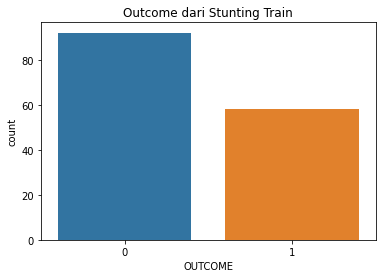

In [181]:
sns.countplot(df_train['OUTCOME'])
plt.title("Outcome dari Stunting Train")
plt.ioff()

In [182]:
df_test = pd.read_csv('/content/sample_data/Stunting_Test.csv')

x_test = df_test.values
x_test = np.delete(x_test,6, axis=1)
y_test = df_test['OUTCOME'].values

In [183]:
df_test

,AGE (MONTH),HEIGHT (CM),WEIGHT (KG),HEAD CIRCUM (CM),CHEST SIZE (CM),BELLY CIRCUM (CM),OUTCOME
0,33,88.0,12.0,49,55,47,0
1,3,55.0,8.0,42,44,47,0
2,35,87.0,12.0,51,47,47,0
3,25,83.0,10.0,49,48,48,0
4,24,83.0,11.0,46,47,47,0
...,...,...,...,...,...,...,...
113,6,65.0,7.2,42,48,44,0
114,36,91.0,11.5,48,47,44,0
115,20,87.0,10.0,43,44,44,0
116,41,89.5,11.0,50,52,53,1


In [184]:
df_test.columns

Index(['AGE (MONTH)', 'HEIGHT (CM)', 'WEIGHT (KG)', 'HEAD CIRCUM (CM)',
       'CHEST SIZE (CM)', 'BELLY CIRCUM (CM)', 'OUTCOME'],
      dtype='object')

In [185]:
df_test.shape

(118, 7)

In [186]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE (MONTH),118.0,30.822034,17.533670,2.0,17.000,33.5,41.0,60.0
HEIGHT (CM),118.0,83.449153,13.783024,50.0,76.000,86.5,92.0,111.0
WEIGHT (KG),118.0,11.645763,5.573957,4.0,9.025,11.0,13.2,61.0
HEAD CIRCUM (CM),118.0,47.881356,3.791961,35.0,46.000,49.0,50.0,59.0
CHEST SIZE (CM),118.0,48.161017,4.639058,30.0,46.000,48.0,50.0,59.0
BELLY CIRCUM (CM),118.0,48.194915,4.782908,32.0,46.000,48.0,50.0,60.0
OUTCOME,118.0,0.296610,0.458711,0.0,0.000,0.0,1.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


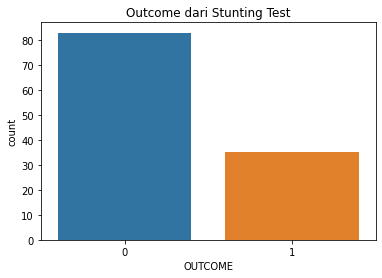

In [187]:
sns.countplot(df_test['OUTCOME'])
plt.title('Outcome dari Stunting Test')
plt.ioff()

In [411]:
x_train = MinMaxScaler().fit_transform(x_train)
x_test  = MinMaxScaler().fit_transform(x_test)

In [538]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=[6,]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [539]:
model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_191 (Dense)           (None, 512)               3584      
                                                                 
 dense_192 (Dense)           (None, 128)               65664     
                                                                 
 dense_193 (Dense)           (None, 128)               16512     
                                                                 
 dense_194 (Dense)           (None, 1)                 129       
                                                                 
Total params: 85,889
Trainable params: 85,889
Non-trainable params: 0
_________________________________________________________________


In [540]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [541]:
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics= ['accuracy', f1_m,precision_m, recall_m])

In [542]:
model.fit(x_train, y_train, epochs=400, verbose=2, validation_split=0.3, batch_size=10)

Epoch 1/400
11/11 - 2s - loss: 0.6933 - accuracy: 0.5238 - f1_m: 0.0711 - precision_m: 0.0481 - recall_m: 0.1818 - val_loss: 0.6677 - val_accuracy: 0.6222 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - 2s/epoch - 151ms/step
Epoch 2/400
11/11 - 0s - loss: 0.6791 - accuracy: 0.6095 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6602 - val_accuracy: 0.6222 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - 80ms/epoch - 7ms/step
Epoch 3/400
11/11 - 0s - loss: 0.6781 - accuracy: 0.6095 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6670 - val_accuracy: 0.6222 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - 89ms/epoch - 8ms/step
Epoch 4/400
11/11 - 0s - loss: 0.6646 - accuracy: 0.6095 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6573 - val_accuracy: 0.6222 - val_f1_m: 0.0000e+00 - val_pre

In [543]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=2)

4/4 - 0s - loss: 0.5008 - accuracy: 0.9492 - f1_m: 0.9174 - precision_m: 0.8958 - recall_m: 0.9416 - 28ms/epoch - 7ms/step


In [544]:
y_pred = model.predict(x_test)
y_pred = y_pred >= 0.10

In [545]:
round(accuracy_score(y_test, y_pred),3)

0.915

In [546]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


In [547]:
model = tf.keras.applications.MobileNetV3Large()
fb_model = tf.lite.TFLiteConverter.from_keras_model(model).convert()

tf.lite.experimental.Analyzer.analyze(model_content=fb_model)

22675456/22661472 [==============================] - 0s 0us/step
INFO:tensorflow:Assets written to: /tmp/tmp3ef7n54_/assets


=== TFLite ModelAnalyzer ===

Your TFLite model has '1' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the MUL op takes
tensor #0 and tensor #19 as input and produces tensor #136 as output.

Subgraph#0 main(T#0) -> [T#263]
  Op#0 MUL(T#0, T#19) -> [T#136]
  Op#1 ADD(T#136, T#18) -> [T#137]
  Op#2 CONV_2D(T#137, T#44, T#93) -> [T#138]
  Op#3 HARD_SWISH(T#138) -> [T#139]
  Op#4 DEPTHWISE_CONV_2D(T#139, T#94, T#24) -> [T#140]
  Op#5 CONV_2D(T#140, T#45, T#95) -> [T#141]
  Op#6 ADD(T#139, T#141) -> [T#142]
  Op#7 CONV_2D(T#142, T#46, T#25) -> [T#143]
  Op#8 PAD(T#143, T#22) -> [T#144]
  Op#9 DEPTHWISE_CONV_2D(T#144, T#96, T#26) -> [T#145]
  Op#10 CONV_2D(T#145, T#47, T#97) -> [T#146]
  Op#11 CONV_2D(T#146, T#48, T#27) -> [T#147]
  Op#12 DEPTHWISE_CONV_2D(T#147, T#98, T#28) -> [T#148]
  Op#13 CONV_2D(T#148, T#49, T#99) -> [T#149]
  Op#14 ADD(T#146, T#149) -> [T#150]
  Op#15 CONV_2D(T#150, T#50, T#29) -> [T#151]
  Op#16 PAD(T#151

In [560]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [561]:
tflite_model_file = pathlib.Path('/content/model.tflite')
tflite_model_file.write_bytes(tflite_model)

345808

In [563]:
with open(tflite_model_files, 'rb') as fid:
    tflite_model = fid.read()
    
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [564]:
files.download(tflite_model_files)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>